<a href="https://colab.research.google.com/github/Lailamh/DSRP1/blob/main/Data_Science_Research_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn import datasets, model_selection, metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import *
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *
from scipy.stats import ttest_ind
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
url = "https://raw.githubusercontent.com/dsollberger/quartoblog/master/posts/office_sentiment/office_sentiment.csv"
office_df = pd.read_csv(url)

In [ ]:
office_df.head()

,index,season,episode,episode_name,director,writer,character,text,text_w_direction,imdb_rating,total_votes,air_date,sentimentAnalysis_score,sentimentr_score,syuzhet_score
0,1,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,All right Jim. Your quarterlies look very good...,All right Jim. Your quarterlies look very good...,7.6,3706,2005-03-24,0.285714,0.134552,2.15
1,2,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Jim,"Oh, I told you. I couldn't close it. So...","Oh, I told you. I couldn't close it. So...",7.6,3706,2005-03-24,0.000000,0.461880,0.00
2,3,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,So you've come to the master for guidance? Is ...,So you've come to the master for guidance? Is ...,7.6,3706,2005-03-24,0.428571,0.603738,0.50
3,4,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Jim,"Actually, you called me in here, but yeah.","Actually, you called me in here, but yeah.",7.6,3706,2005-03-24,0.000000,0.244949,0.00
4,5,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,"All right. Well, let me show you how it's done.","All right. Well, let me show you how it's done.",7.6,3706,2005-03-24,0.400000,0.000000,1.60


In [ ]:
office_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55130 entries, 0 to 55129
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    55130 non-null  int64  
 1   season                   55130 non-null  int64  
 2   episode                  55130 non-null  int64  
 3   episode_name             55130 non-null  object 
 4   director                 55130 non-null  object 
 5   writer                   55130 non-null  object 
 6   character                55130 non-null  object 
 7   text                     54753 non-null  object 
 8   text_w_direction         55125 non-null  object 
 9   imdb_rating              55130 non-null  float64
 10  total_votes              55130 non-null  int64  
 11  air_date                 55130 non-null  object 
 12  sentimentAnalysis_score  51718 non-null  float64
 13  sentimentr_score         55130 non-null  float64
 14  syuzhet_score         

In [ ]:
office_df[office_df['text'].isnull()]

,index,season,episode,episode_name,director,writer,character,text,text_w_direction,imdb_rating,total_votes,air_date,sentimentAnalysis_score,sentimentr_score,syuzhet_score
149,150,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Pam,NaN,[Laughing],7.6,3706,2005-03-24,NaN,0.138675,0.0
345,346,1,2,Diversity Day,Ken Kwapis,B.J. Novak,Jim,NaN,[/b],8.3,3566,2005-03-29,NaN,0.000000,0.0
1215,1216,1,6,Hot Girl,Amy Heckerling,Mindy Kaling,Kevin,NaN,[nods],7.8,2852,2005-04-26,NaN,-0.166667,0.0
1247,1248,1,6,Hot Girl,Amy Heckerling,Mindy Kaling,Toby,NaN,[looks resigned],7.8,2852,2005-04-26,NaN,0.000000,0.0
1288,1289,1,6,Hot Girl,Amy Heckerling,Mindy Kaling,Pam,NaN,[smiles],7.8,2852,2005-04-26,NaN,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54679,54680,9,24,Finale,Ken Kwapis,Greg Daniels,Bill Hader,NaN,[pulling multiple tissues out],9.7,7934,2013-05-16,NaN,0.326599,0.0
54761,54762,9,24,Finale,Ken Kwapis,Greg Daniels,Guy,NaN,[fake cries],9.7,7934,2013-05-16,NaN,0.353553,0.0
54777,54778,9,24,Finale,Ken Kwapis,Greg Daniels,Rachel,NaN,[speaks in a special language],9.7,7934,2013-05-16,NaN,0.200446,0.0
54830,54831,9,24,Finale,Ken Kwapis,Greg Daniels,All,NaN,[screams],9.7,7934,2013-05-16,NaN,-0.121854,0.0


In [ ]:
#removing null values for 'text'
office_df = office_df.dropna(axis = 0, how='any', subset = ['text'])
office_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54753 entries, 0 to 55129
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    54753 non-null  int64  
 1   season                   54753 non-null  int64  
 2   episode                  54753 non-null  int64  
 3   episode_name             54753 non-null  object 
 4   director                 54753 non-null  object 
 5   writer                   54753 non-null  object 
 6   character                54753 non-null  object 
 7   text                     54753 non-null  object 
 8   text_w_direction         54753 non-null  object 
 9   imdb_rating              54753 non-null  float64
 10  total_votes              54753 non-null  int64  
 11  air_date                 54753 non-null  object 
 12  sentimentAnalysis_score  51718 non-null  float64
 13  sentimentr_score         54753 non-null  float64
 14  syuzhet_score            54

In [ ]:
#imputing null values for 'sentimentAnalysis_score'
office_df[office_df['sentimentAnalysis_score'].isnull()]
office_df['sentimentAnalysis_score'].unique()

array([ 0.28571429,  0.        ,  0.42857143,  0.4       ,  0.09756098,
        0.06896552,  0.33333333,  0.125     ,         nan,  0.09090909,
        0.22222222,  0.2       ,  0.5       ,  0.66666667, -1.        ,
        0.25      ,  0.08333333, -0.16666667, -0.33333333,  1.        ,
       -0.125     , -0.19230769, -0.25      , -0.11111111, -0.66666667,
        0.04347826, -0.4       ,  0.36363636,  0.16666667,  0.1875    ,
        0.18518519,  0.1       , -0.5       , -0.05      ,  0.14285714,
       -0.2       ,  0.06666667, -0.22222222,  0.07692308,  0.6       ,
        0.41666667, -0.04761905,  0.05      ,  0.07142857, -0.03846154,
        0.13513514,  0.3       ,  0.75      ,  0.04545455,  0.15      ,
        0.375     ,  0.04      , -0.1       ,  0.13333333,  0.17647059,
        0.11111111,  0.09433962,  0.71428571,  0.08571429,  0.03846154,
        0.18918919,  0.11764706,  0.06122449,  0.05882353,  0.23076923,
        0.10526316,  0.44444444,  0.13636364,  0.30769231,  0.18

In [18]:
#filling in null values for 'sentimentAnalysis_score' with numbers provided from .unique()
office_df.loc[office_df['sentimentAnalysis_score'].isnull(), 'sentimentAnalysis_score'] = 'non-null value'
office_df = office_df[office_df['sentimentAnalysis_score'] != 0.0]
office_df.info()
office_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 31005 entries, 0 to 55129
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    31005 non-null  int64  
 1   season                   31005 non-null  int64  
 2   episode                  31005 non-null  int64  
 3   episode_name             31005 non-null  object 
 4   director                 31005 non-null  object 
 5   writer                   31005 non-null  object 
 6   character                31005 non-null  object 
 7   text                     30628 non-null  object 
 8   text_w_direction         31000 non-null  object 
 9   imdb_rating              31005 non-null  float64
 10  total_votes              31005 non-null  int64  
 11  air_date                 31005 non-null  object 
 12  sentimentAnalysis_score  31005 non-null  object 
 13  sentimentr_score         31005 non-null  float64
 14  syuzhet_score            31

,index,season,episode,episode_name,director,writer,character,text,text_w_direction,imdb_rating,total_votes,air_date,sentimentAnalysis_score,sentimentr_score,syuzhet_score
0,1,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,All right Jim. Your quarterlies look very good...,All right Jim. Your quarterlies look very good...,7.6,3706,2005-03-24,0.285714,0.134552,2.15
2,3,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,So you've come to the master for guidance? Is ...,So you've come to the master for guidance? Is ...,7.6,3706,2005-03-24,0.428571,0.603738,0.50
4,5,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,"All right. Well, let me show you how it's done.","All right. Well, let me show you how it's done.",7.6,3706,2005-03-24,0.4,0.000000,1.60
5,6,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,"Yes, I'd like to speak to your office manager,...","[on the phone] Yes, I'd like to speak to your ...",7.6,3706,2005-03-24,0.097561,0.000000,4.60
6,7,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,"I've, uh, I've been at Dunder Mifflin for 12 y...","I've, uh, I've been at Dunder Mifflin for 12 y...",7.6,3706,2005-03-24,0.068966,0.000000,0.80


# **Notes to self:**

**imdb_rating**: The IMDb user rating for the episode, on a 1–10 scale.

**total_votes**: The number of IMDb users who voted on the episode's rating.

**sentimentAnalysis_score**: Sentiment score from the `sentimentAnalysis` package. Values typically range from -1 (very negative) to 1 (very positive), with 0 representing neutral sentiment.

**sentimentr_score**: Sentiment score from the `sentimentr` package, which accounts for context and valence shifters (e.g., negations). Scores generally fall between -1 and 1, where negative values indicate negative sentiment, positive values indicate positive sentiment, and values near 0 are neutral.

**syuzhet_score**: Sentiment score from the `syuzhet` package, derived from a dictionary-based approach. Unlike the others, these scores can extend beyond the -1 to 1 range and are unbounded, but they still follow the same directional logic: negative values indicate negative sentiment, positive values indicate positive sentiment.

In [ ]:
office_df.describe()

,index,season,episode,imdb_rating,total_votes,sentimentr_score,syuzhet_score
count,30628.000000,30628.000000,30628.000000,30628.000000,30628.000000,30628.000000,30628.000000
mean,27688.297244,5.553121,12.582114,8.298305,2172.251241,0.060810,0.387012
std,15999.661345,2.354823,7.303724,0.553531,888.778534,0.263501,0.868967
min,1.000000,1.000000,1.000000,6.700000,1393.000000,-2.236068,-5.000000
25%,13791.750000,4.000000,6.000000,7.900000,1627.000000,0.000000,0.000000
50%,27769.500000,6.000000,12.000000,8.300000,1962.000000,0.000000,0.350000
75%,41623.250000,8.000000,19.000000,8.700000,2403.000000,0.125000,0.800000
max,55130.000000,9.000000,28.000000,9.700000,7934.000000,2.236068,7.750000


In [ ]:
office_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30628 entries, 0 to 55129
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    30628 non-null  int64  
 1   season                   30628 non-null  int64  
 2   episode                  30628 non-null  int64  
 3   episode_name             30628 non-null  object 
 4   director                 30628 non-null  object 
 5   writer                   30628 non-null  object 
 6   character                30628 non-null  object 
 7   text                     30628 non-null  object 
 8   text_w_direction         30628 non-null  object 
 9   imdb_rating              30628 non-null  float64
 10  total_votes              30628 non-null  int64  
 11  air_date                 30628 non-null  object 
 12  sentimentAnalysis_score  30628 non-null  object 
 13  sentimentr_score         30628 non-null  float64
 14  syuzhet_score            30

In [19]:
office_df['sentimentAnalysis_score'] = pd.to_numeric(office_df['sentimentAnalysis_score'], errors = 'coerce')

#office_df['sentimentAnalysis_score'] = office_df['sentimentAnalysis_score'].fillna(office_df['sentimentAnalysis_score'].mean())
office_df['sentimentAnalysis_score'] = office_df.groupby('character')['sentimentAnalysis_score'].transform(
    lambda x: x.fillna(x.mean())
)
print(office_df['sentimentAnalysis_score'].isna().sum())
#office_df.info()

63



# **Possible research questions!**

1. Are certain characters associated more with positive/negative sentiment?

2. What season was the best, and what do you think made it so great?

3. Which episodes have the highest/lowest average sentiment analysis scores?

4. Is there a correlation between an episode's length and it's ratings?

5. Can sentiment analysis predict an episode's IMDb score?

## Final research question: Are certain characters associated with more negative or positive sentiment in The Office, and how does their associated sentiment develop over each season?



Do the characters in episode 1 and 2 have a negative/positive impact on the Episode's Sentiment Score, and what could this mean for future episodes?

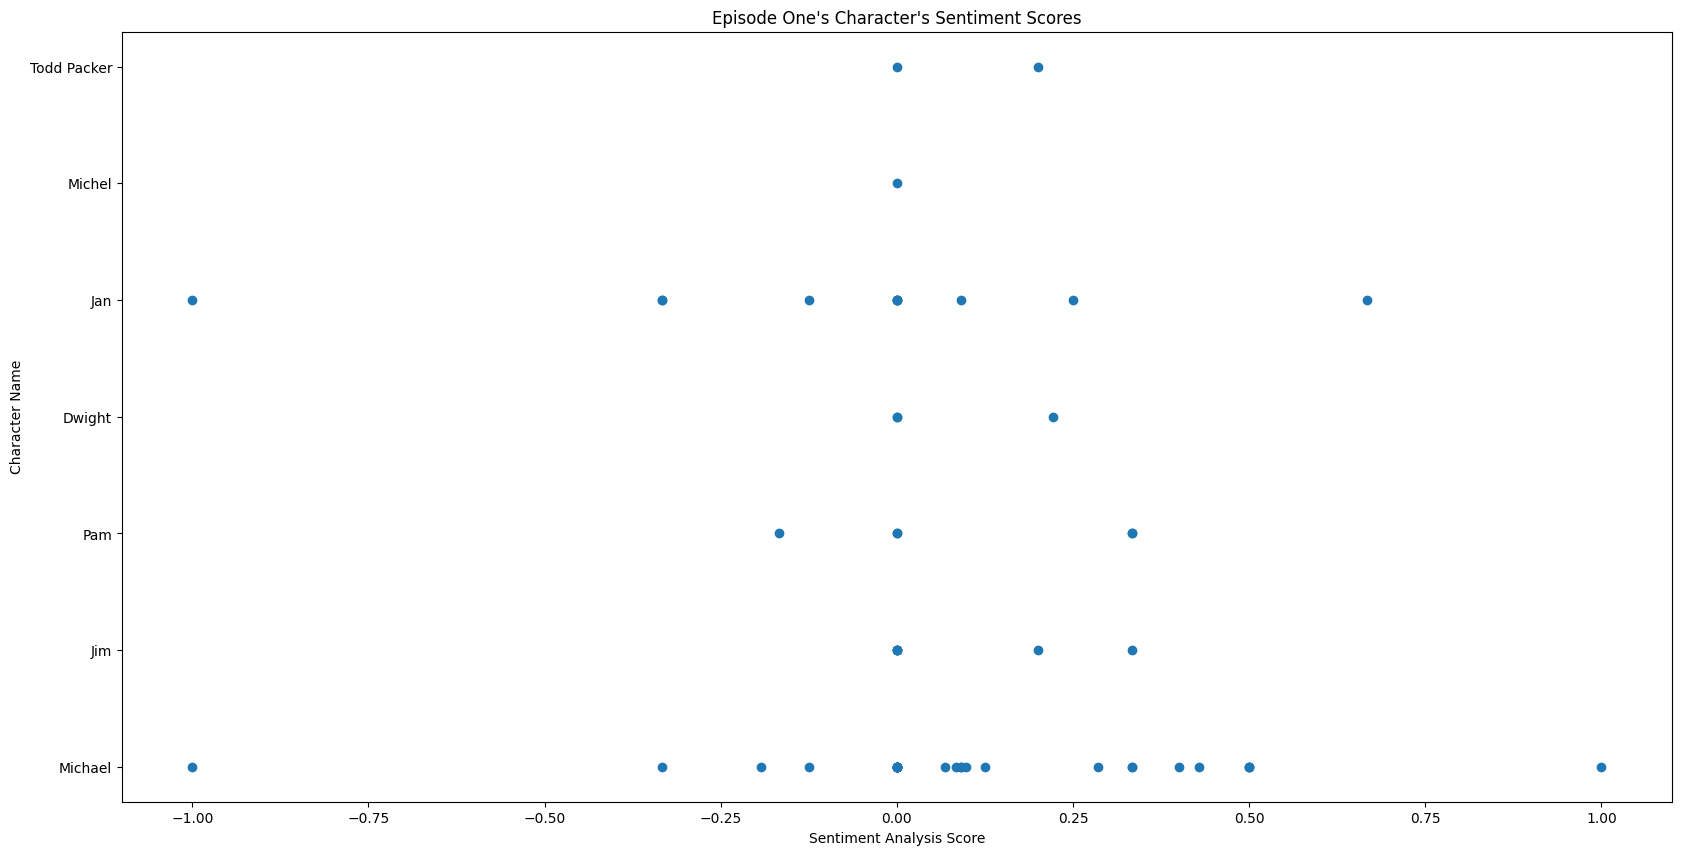

In [ ]:
#making a scatterplot for episode 1

episode1_characters = office_df['character'].iloc[:60]
episode1_sentiment_scores = office_df['sentimentAnalysis_score'].iloc[:60]
plt.figure(figsize=(20, 10))
plt.scatter(episode1_sentiment_scores, episode1_characters)
plt.title("Episode One's Character's Sentiment Scores")
plt.xlabel("Sentiment Analysis Score")
plt.ylabel("Character Name")
plt.show()
#THIS iS FROM EPISODE 1 CALLED: THE PILOT!!! The next graph (below this one) is going to be from EPISODE 2 CALLED: DIVERSITY DAY!!!

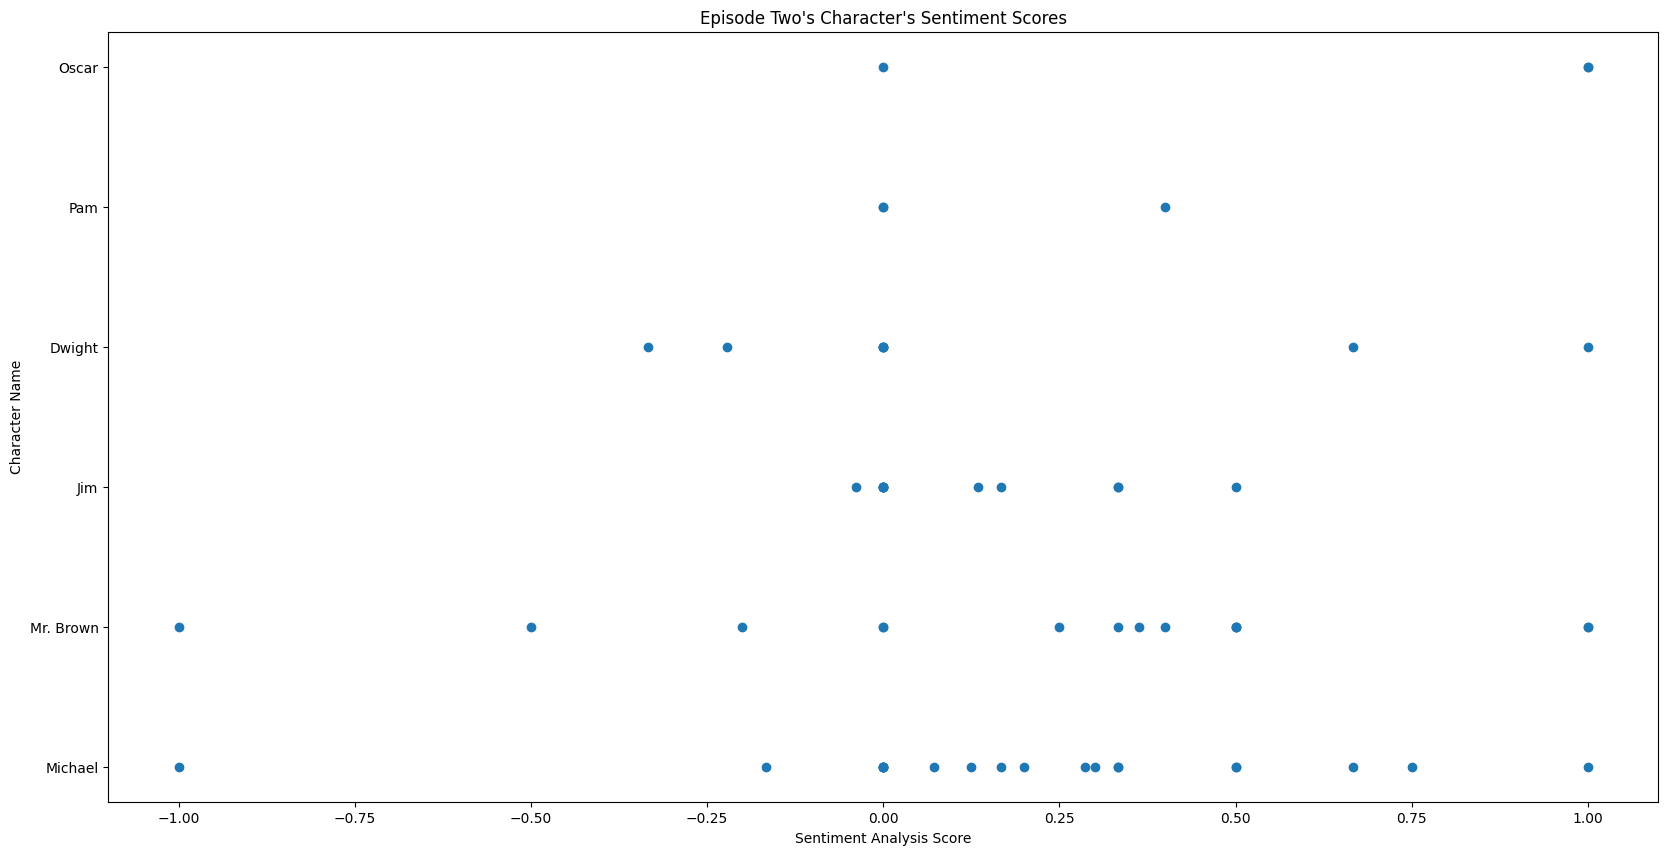

In [ ]:
#office_df.head(230)

#EPISODE 2: DIVERSITY DAY, STARTING LINE 229

episode2_characters = office_df['character'].iloc[229:290]
episode2_sentiment_scores = office_df['sentimentAnalysis_score'].iloc[229:290]
plt.figure(figsize=(20, 10))
plt.scatter(episode2_sentiment_scores, episode2_characters)
plt.title("Episode Two's Character's Sentiment Scores")
plt.xlabel("Sentiment Analysis Score")
plt.ylabel("Character Name")
plt.show()

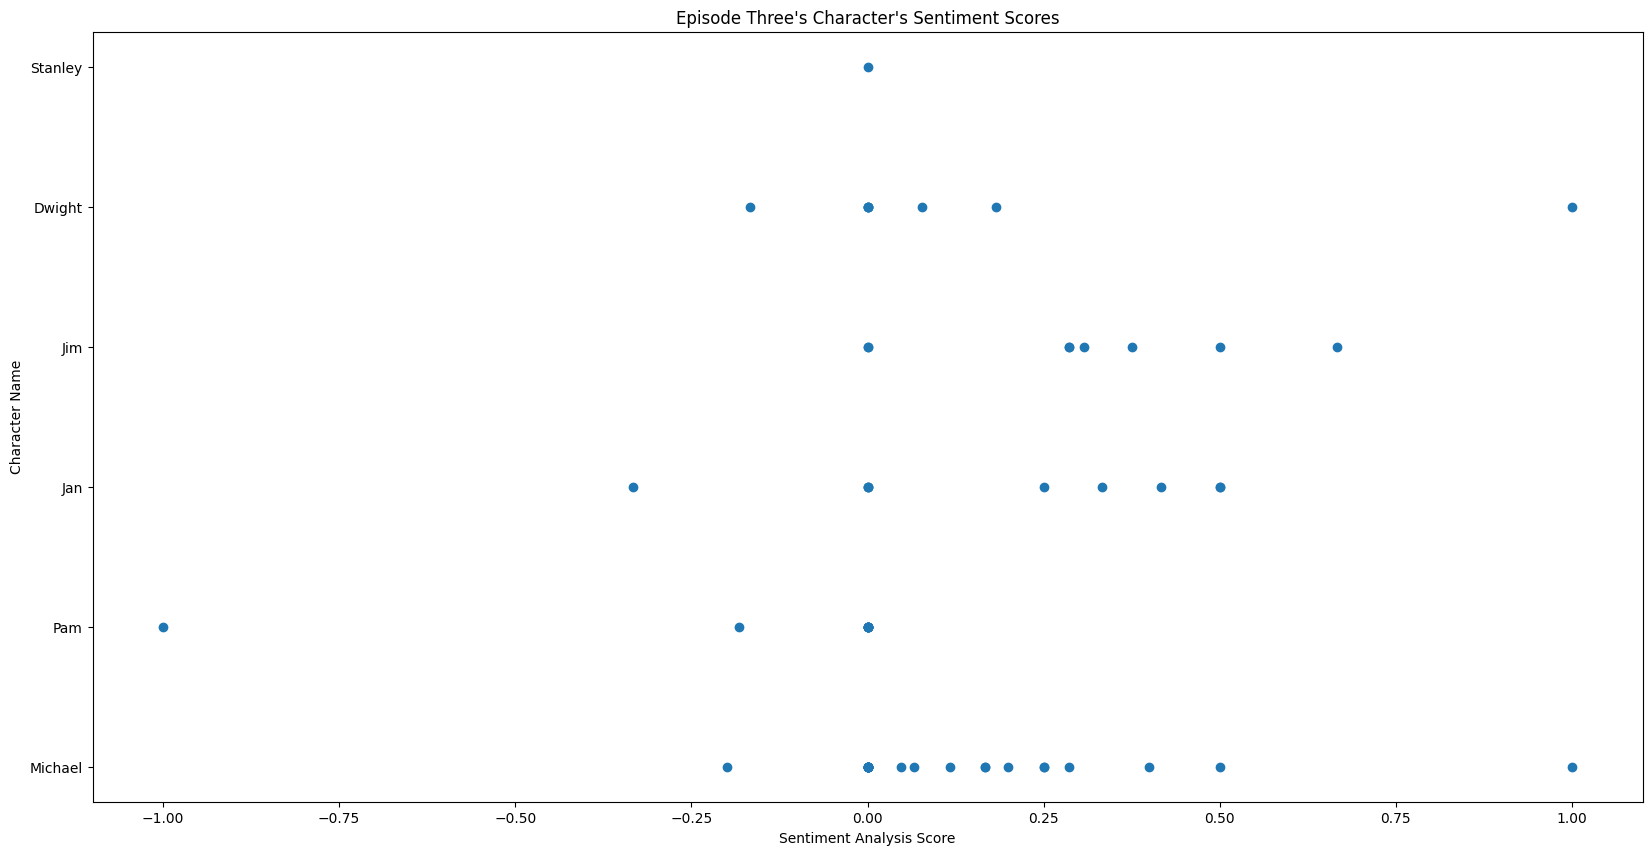

In [ ]:
#office_df.head(433)

#EPISODE #3: HEALTH CARE, STARTING LINE 432
episode3_characters = office_df['character'].iloc[432:493]
episode3_sentiment_scores = office_df['sentimentAnalysis_score'].iloc[432:493]
plt.figure(figsize=(20, 10))
plt.scatter(episode3_sentiment_scores, episode3_characters)
plt.title("Episode Three's Character's Sentiment Scores")
plt.xlabel("Sentiment Analysis Score")
plt.ylabel("Character Name")
plt.show()


Now I'll work on the ***lightning talk slide***.
Here is a picture of the slide below. It's one slide per graph, so there's three slides. But the format is the same so it looks like one slide just with the image in the center changing!


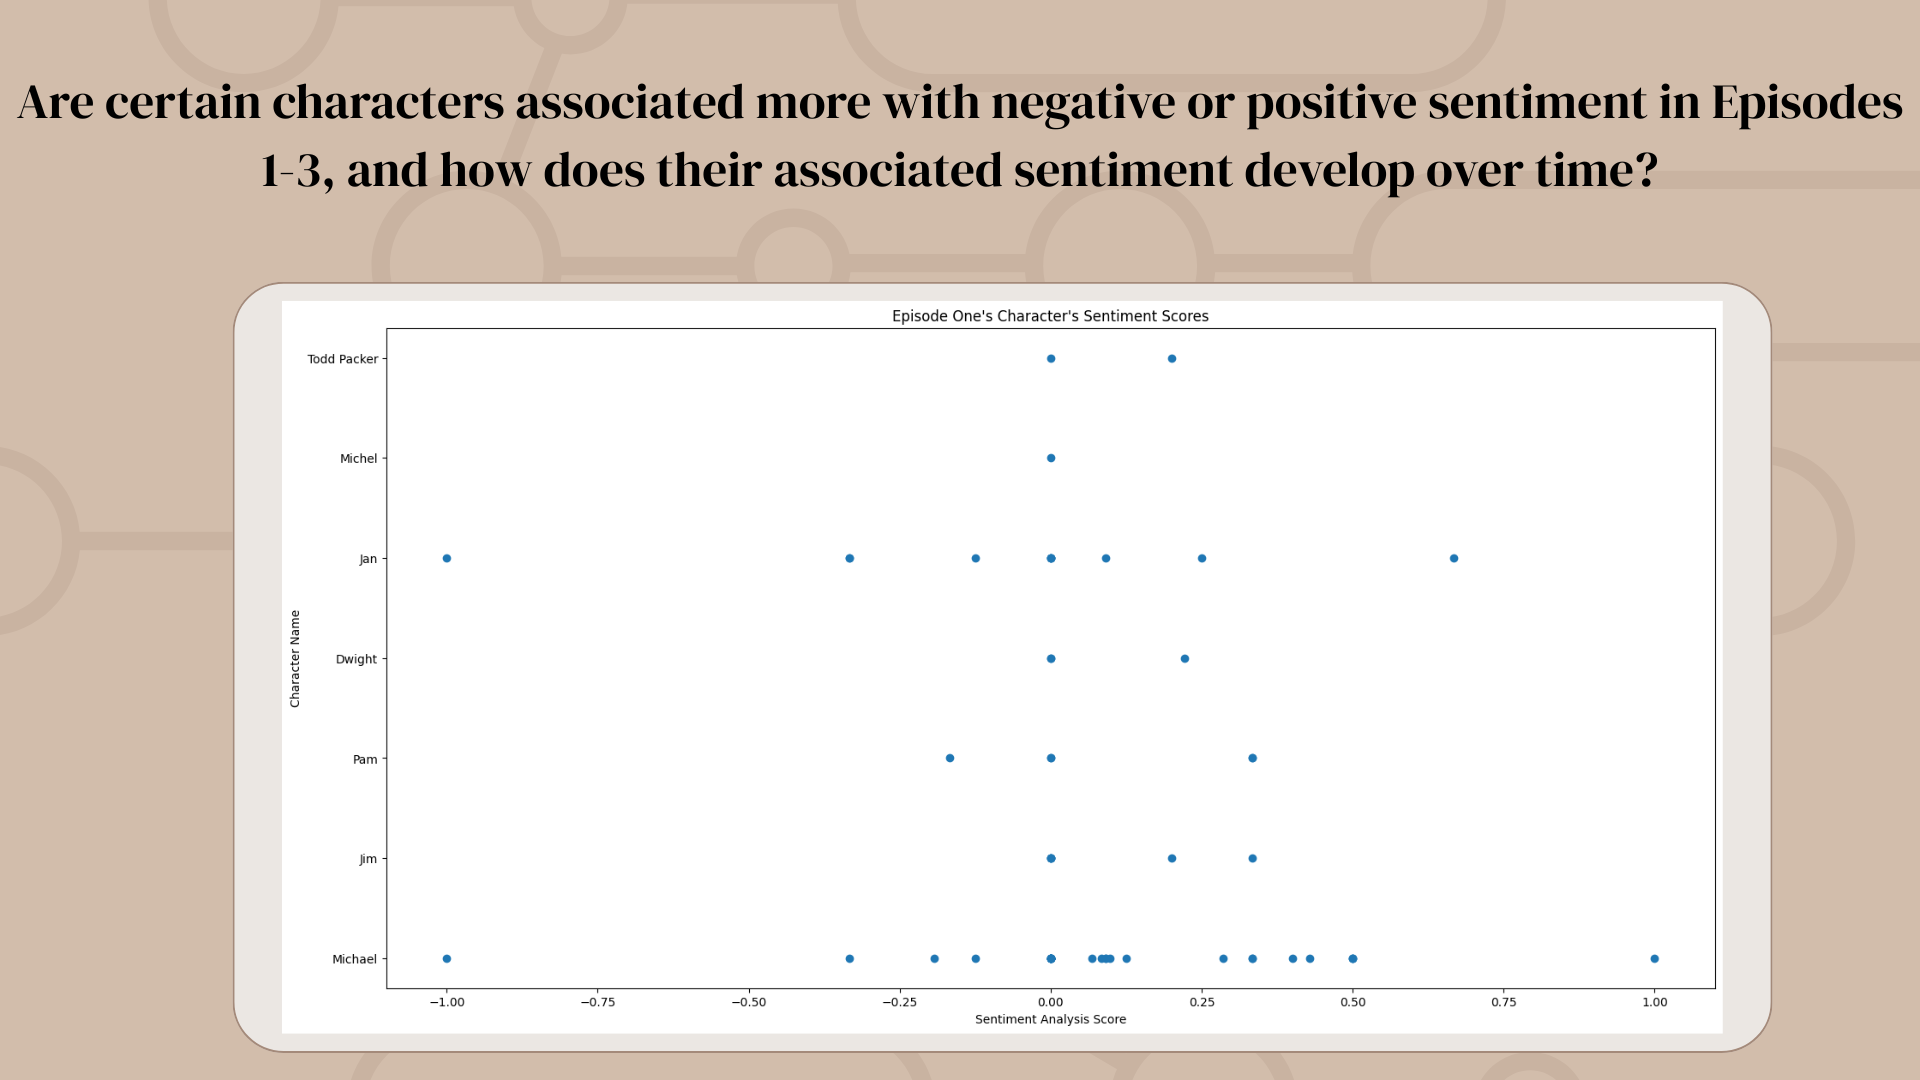

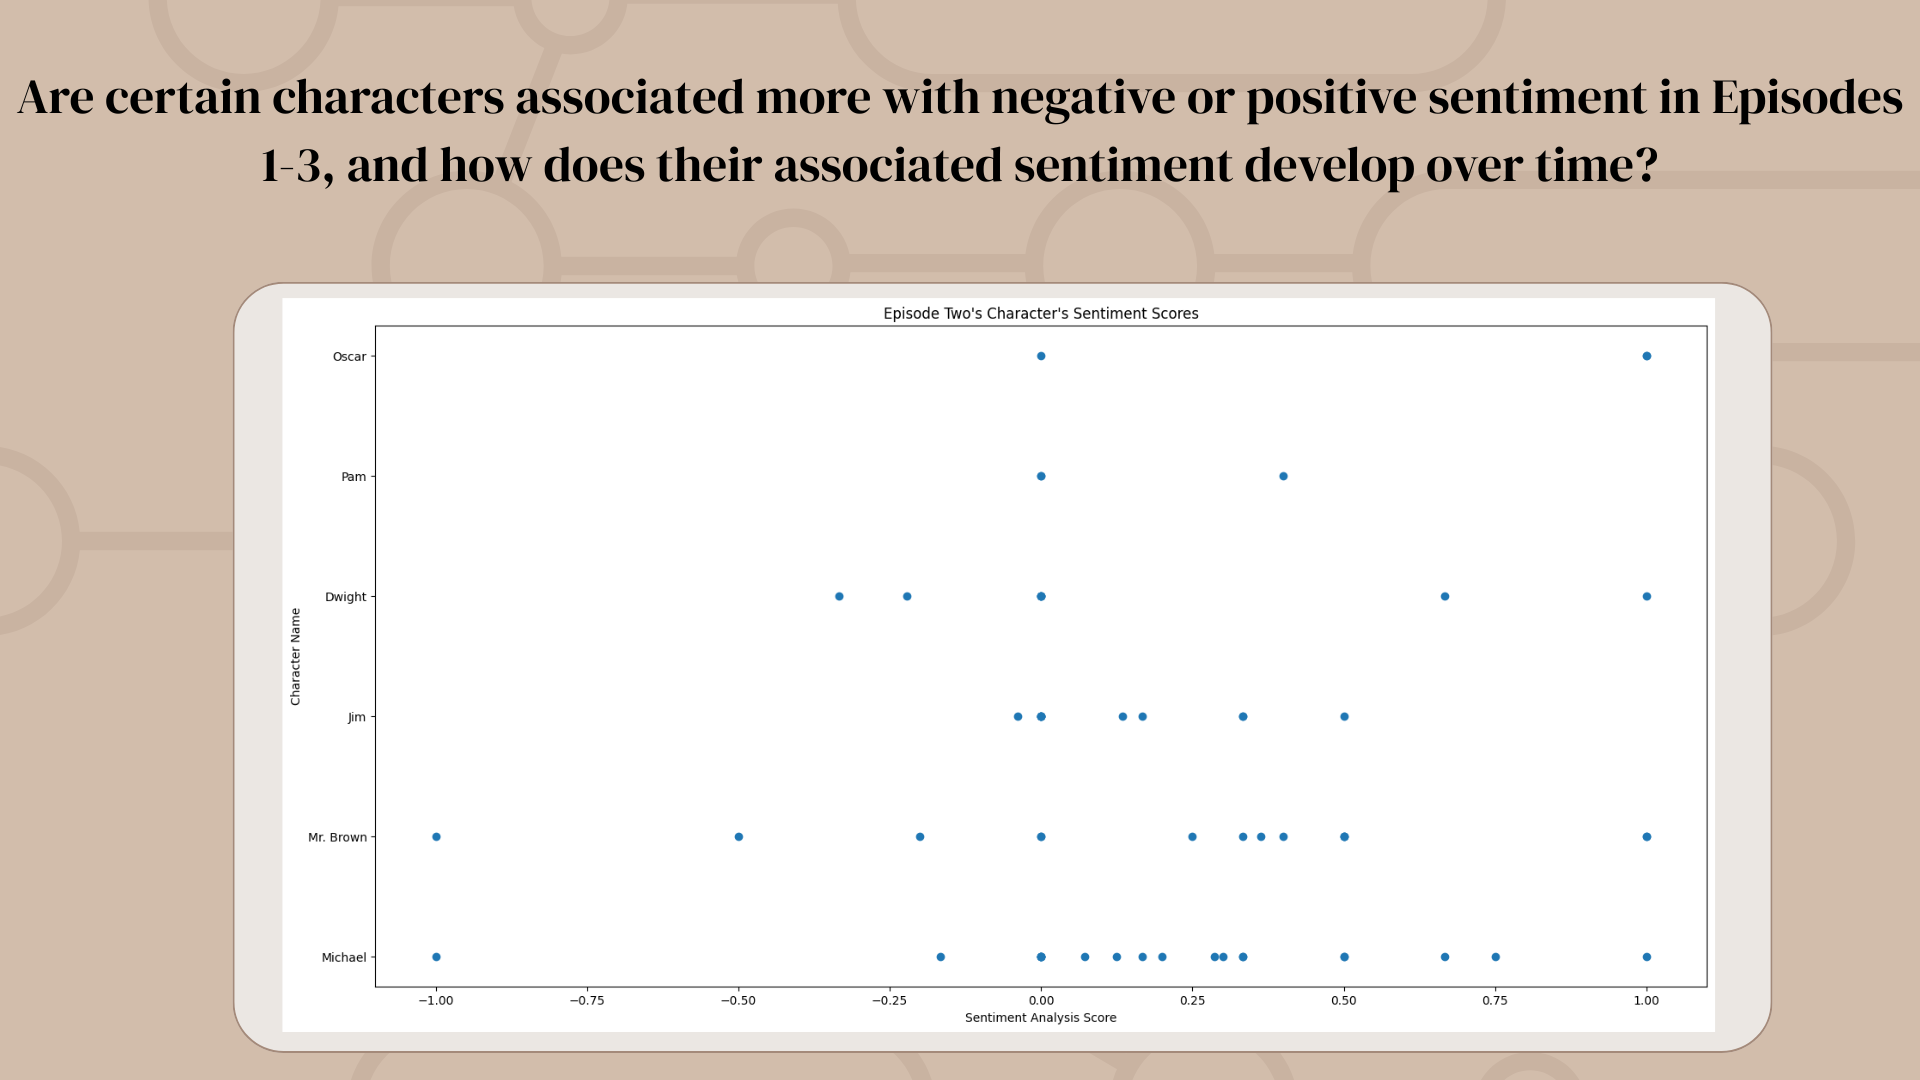

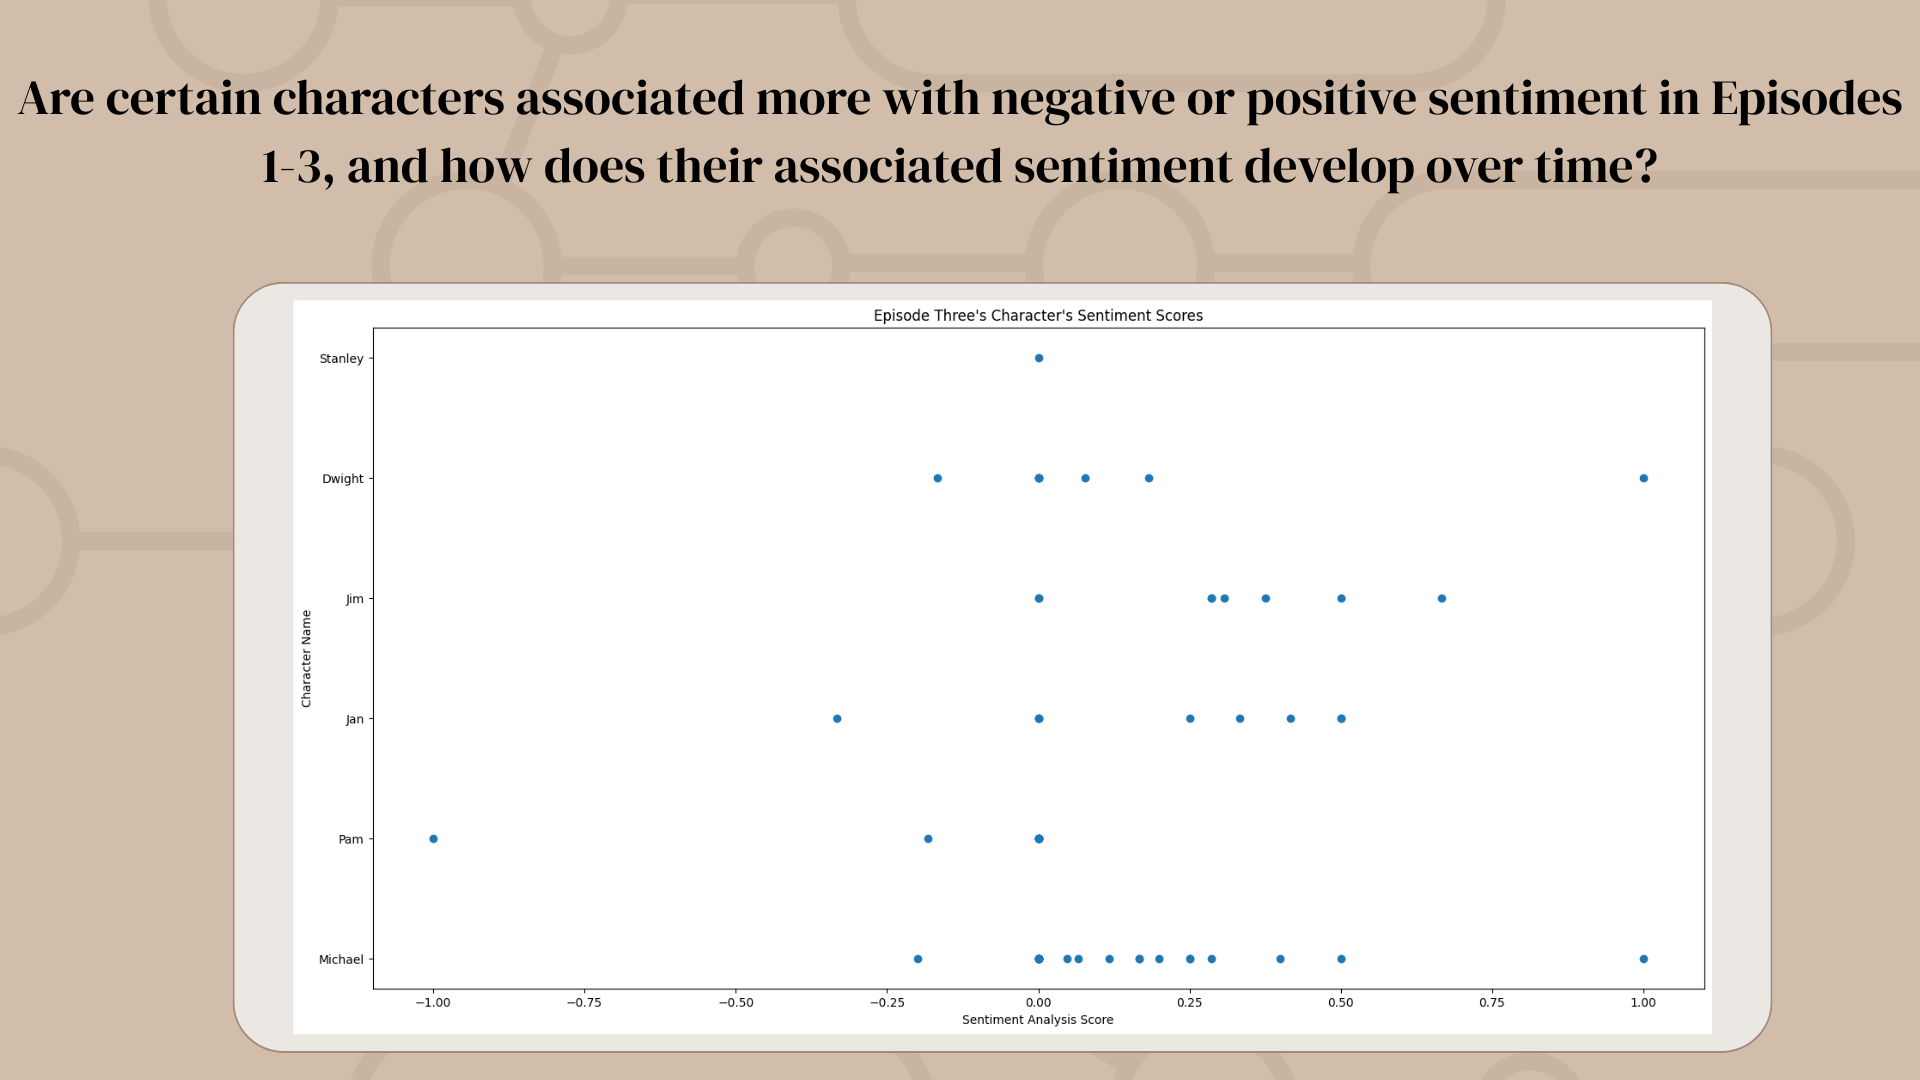

In [14]:
office_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30971 entries, 0 to 55129
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    30971 non-null  int64  
 1   season                   30971 non-null  int64  
 2   episode                  30971 non-null  int64  
 3   episode_name             30971 non-null  object 
 4   director                 30971 non-null  object 
 5   writer                   30971 non-null  object 
 6   character                30971 non-null  object 
 7   text                     30608 non-null  object 
 8   text_w_direction         30966 non-null  object 
 9   imdb_rating              30971 non-null  float64
 10  total_votes              30971 non-null  int64  
 11  air_date                 30971 non-null  object 
 12  sentimentAnalysis_score  30938 non-null  float64
 13  sentimentr_score         30971 non-null  float64
 14  syuzhet_score            30

In [20]:
#Null hypothesis: The character's sentiment score throughout the show doesn't change.

characters = ['Pam', "Jim", "Dwight", "Michael"]

sentiment_median = office_df['sentimentAnalysis_score'].median()
office_df['sentimentAnalysis_score'] = office_df['sentimentAnalysis_score'].fillna(sentiment_median)
office_df['sentimentAnalysis_score'] = pd.to_numeric(office_df['sentimentAnalysis_score'], errors='coerce')



episode1_df = office_df[office_df['episode'] == 1]
episode2_df = office_df[office_df['episode'] == 2]

episode23_df = office_df[office_df['episode'] == 23]
episode24_df = office_df[office_df['episode'] == 24]


results = []

for character in characters:
  first_episodes = pd.concat([
      episode1_df[episode1_df['character'] == character]['sentimentAnalysis_score'].dropna(),
      episode2_df[episode2_df['character'] == character]['sentimentAnalysis_score'].dropna()
      ])
  last_episodes = pd.concat([
      episode23_df[episode23_df['character'] == character]['sentimentAnalysis_score'].dropna(),
      episode24_df[episode24_df['character'] == character]['sentimentAnalysis_score'].dropna()
      ])



  t_stat, p_val = ttest_ind(first_episodes, last_episodes)
  results.append((character, p_val, t_stat))
  #print(character)
  #print(episode1_scores)
  #print(episode2_scores)

print(results)

#ep1_counts = episode1_df['character'].value_counts()
#p2_counts = episode2_df['character'].value_counts()
#print(ep1_counts)
#print(ep2_counts)



[('Pam', np.float64(0.5401593701045213), np.float64(0.6130924102863374)), ('Jim', np.float64(0.6186615320568976), np.float64(0.49806783609078675)), ('Dwight', np.float64(0.7752628683611023), np.float64(0.28562746821575485)), ('Michael', np.float64(0.33344997707497503), np.float64(-0.9676779380828656))]


In [23]:
#getting variables ready for ML model

pam_df = office_df[office_df['character'] == "Pam"]
jim_df = office_df[office_df['character'] == "Jim"]
michael_df = office_df[office_df['character'] == 'Michael']
dwight_df = office_df[office_df['character'] == "Dwight"]

#making sure pam_df is clean:
#pam_df.info()
#total of 2654 sentiment scores

#making sure jim_df is clean:
#jim_df.info()
#total of 3455 sentiment scores

#making sure michael_df is clean:
#michael_df.info()
#total of 6522 sentiment scores

#making sure dwight_df is clean:
#dwight_df.info()
#total of 3809 sentiment scores


pam_sentiment_df = pam_df['sentimentAnalysis_score']
jim_sentiment_df = jim_df['sentimentAnalysis_score']
michael_sentiment_df = michael_df['sentimentAnalysis_score']
dwight_sentiment_df = dwight_df['sentimentAnalysis_score']

pam_sentiment_first_df = pam_sentiment_df.iloc[:1327]
pam_sentiment_second_df = pam_sentiment_df.iloc[1328:]

jim_sentiment_first_df = jim_sentiment_df.iloc[:662]
jim_sentiment_second_df = jim_sentiment_df.iloc[663:]

michael_sentiment_first_df = michael_sentiment_df.iloc[:3261]
michael_sentiment_second_df = michael_sentiment_df.iloc[3262:]

dwight_sentiment_first_df = dwight_sentiment_df.iloc[:1903]
dwight_sentiment_second_df = dwight_sentiment_df.iloc[1904:]

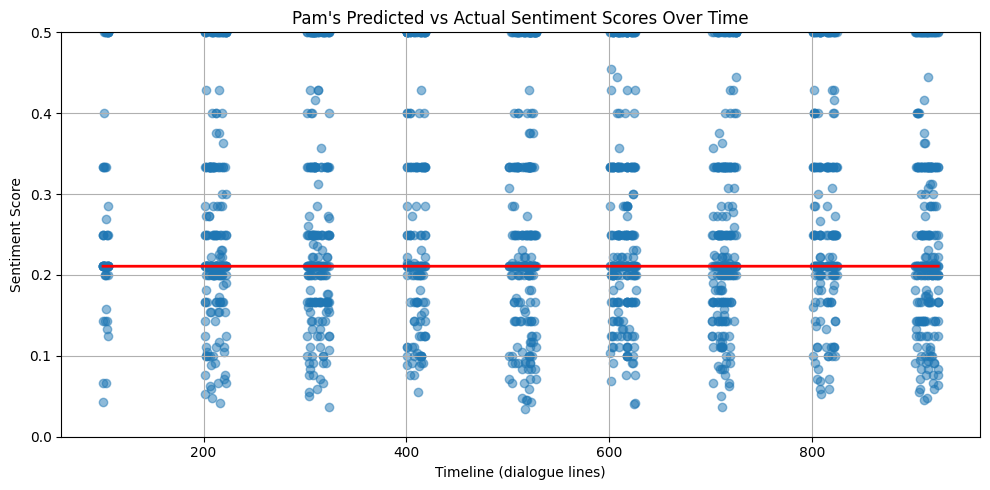

In [32]:
#Pam's ML model


X = (pam_df['season'] * 100 + pam_df['episode']).values.reshape(-1, 1) #X is the timeline (the number of times she has a line
y = pam_sentiment_df.values

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)


#plotting
plt.figure(figsize = (10, 5))
plt.scatter(X, y, alpha = 0.5, label = 'Actual Sentiment Scores')
plt.plot(X, y_pred, color = 'red', linewidth = 2, label = 'Predicted Sentiment Scores')
plt.title("Pam's Predicted vs Actual Sentiment Scores Over Time")
plt.xlabel("Timeline (dialogue lines)")
plt.ylabel("Sentiment Score")
plt.ylim(0, 0.5)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#Pam's ML Model's accuracy

r_squared = model.score(X, y)
print("The r2 score is:", r_squared)

mse_pam = mean_squared_error(y, y_pred)
rmse_pam = np.sqrt(mse_pam)
print("The root mean squared error is:", rmse_pam)

The r2 score is: 6.775640049028198e-10
The root mean squared error is: 0.40949411878384334


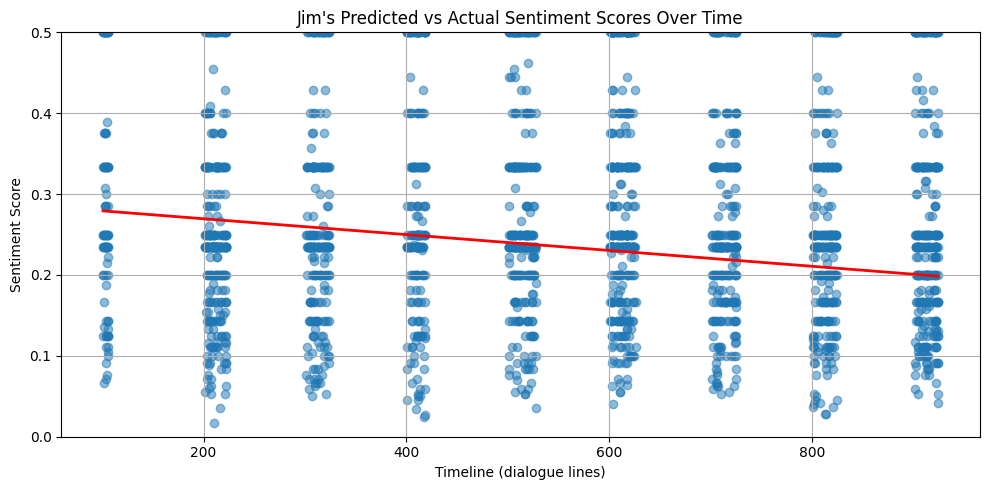

In [31]:
#Jim's ML model
X = (jim_df['season'] * 100 + jim_df['episode']).values.reshape(-1, 1) #X is the timeline (combo of season and episode)
y = jim_sentiment_df.values

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)


#plotting
plt.figure(figsize = (10, 5))
plt.scatter(X, y, alpha = 0.5, label = 'Actual Sentiment Scores')
plt.plot(X, y_pred, color = 'red', linewidth = 2, label = 'Predicted Sentiment Scores')
plt.title("Jim's Predicted vs Actual Sentiment Scores Over Time")
plt.xlabel("Timeline (dialogue lines)")
plt.ylabel("Sentiment Score")
plt.ylim(0, 0.5)
plt.grid(True)
plt.tight_layout()
plt.show()

In [33]:
#Jim's ML Model's accuracy:

r_squared2 = model.score(X, y)
print("The r2 score is:", r_squared2)

mse_jim = mean_squared_error(y, y_pred)
rmse_jim = np.sqrt(mse_jim)
print("The root mean squared error is:", rmse_jim)

The r2 score is: 6.674489849700649e-10
The root mean squared error is: 0.40757897350834726


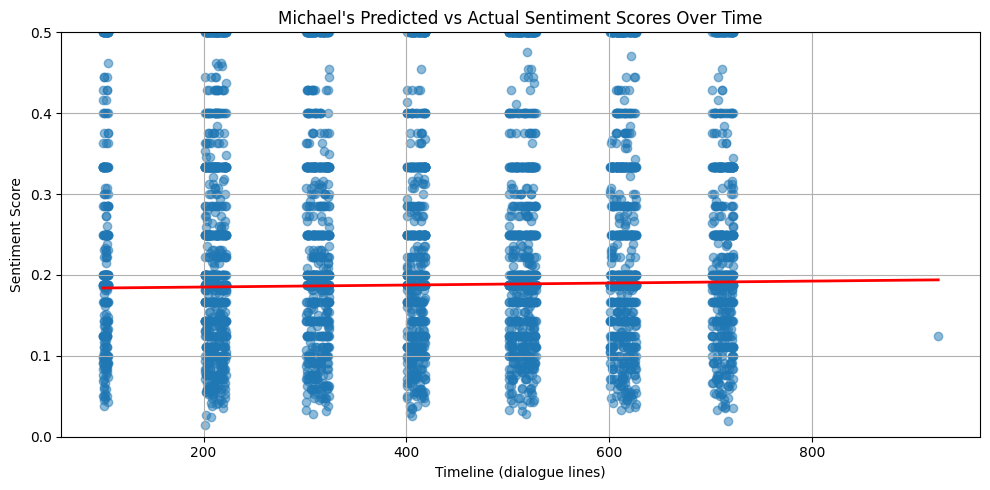

In [34]:
#Michael's ML model

X = (michael_df['season'] * 100 + michael_df['episode']).values.reshape(-1, 1) #X is the timeline (combo of season and episode)
y = michael_sentiment_df.values

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)


#plotting
plt.figure(figsize = (10, 5))
plt.scatter(X, y, alpha = 0.5, label = 'Actual Sentiment Scores')
plt.plot(X, y_pred, color = 'red', linewidth = 2, label = 'Predicted Sentiment Scores')
plt.title("Michael's Predicted vs Actual Sentiment Scores Over Time")
plt.xlabel("Timeline (dialogue lines)")
plt.ylabel("Sentiment Score")
plt.ylim(0, 0.5)
plt.grid(True)
plt.tight_layout()
plt.show()

In [35]:
#Michael's ML Model's accuracy:

r_squared_3 = model.score(X, y)
print("The r2 score is:", r_squared_3)

mse_michael = mean_squared_error(y, y_pred)
rmse_michael = np.sqrt(mse_michael)
print("The root mean squared error is:", rmse_michael)

The r2 score is: 3.758856907709607e-05
The root mean squared error is: 0.3651529190543556


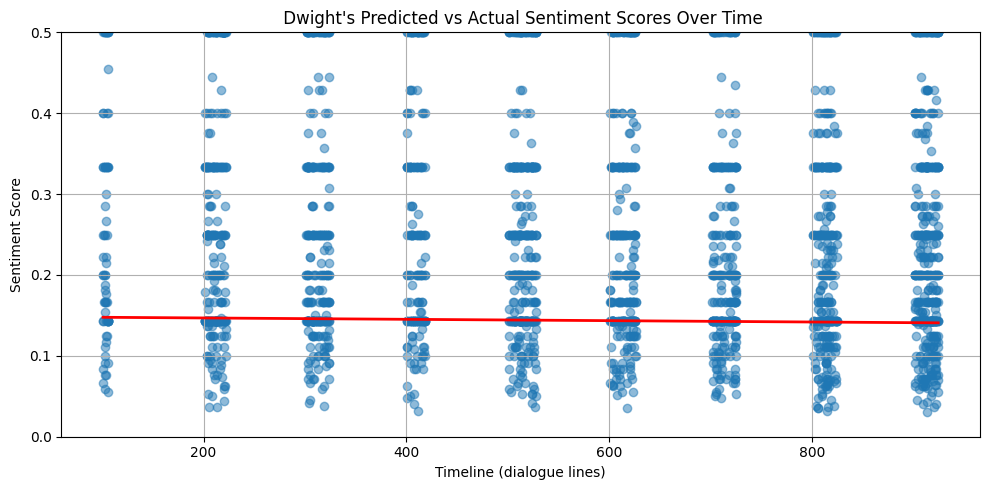

In [36]:
#Dwight's ML model

X = (dwight_df['season'] * 100 + dwight_df['episode']).values.reshape(-1, 1) #X is the timeline (combo of season and episode)
y = dwight_sentiment_df.values

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)


#plotting
plt.figure(figsize = (10, 5))
plt.scatter(X, y, alpha = 0.5, label = 'Actual Sentiment Scores')
plt.plot(X, y_pred, color = 'red', linewidth = 2, label = 'Predicted Sentiment Scores')
plt.title(" Dwight's Predicted vs Actual Sentiment Scores Over Time")
plt.xlabel("Timeline (dialogue lines)")
plt.ylabel("Sentiment Score")
plt.ylim(0, 0.5)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#Dwight's ML Model's accuracy:

r_squared_4 = model.score(X, y)
print("The r2 score is:", r_squared_4)

mse_dwight = mean_squared_error(y, y_pred)
rmse_dwight = np.sqrt(mse_dwight)
print("The root mean squared error is:", rmse_dwight)

The r2 score is: 2.8952049443420336e-05
The root mean squared error is: 0.3869359570400728


# ML Model Predictions will be below in the following order:
1. Pam
2. Jim
3. Michael
4. Dwight

In [ ]:
#Pam's ML model predictions

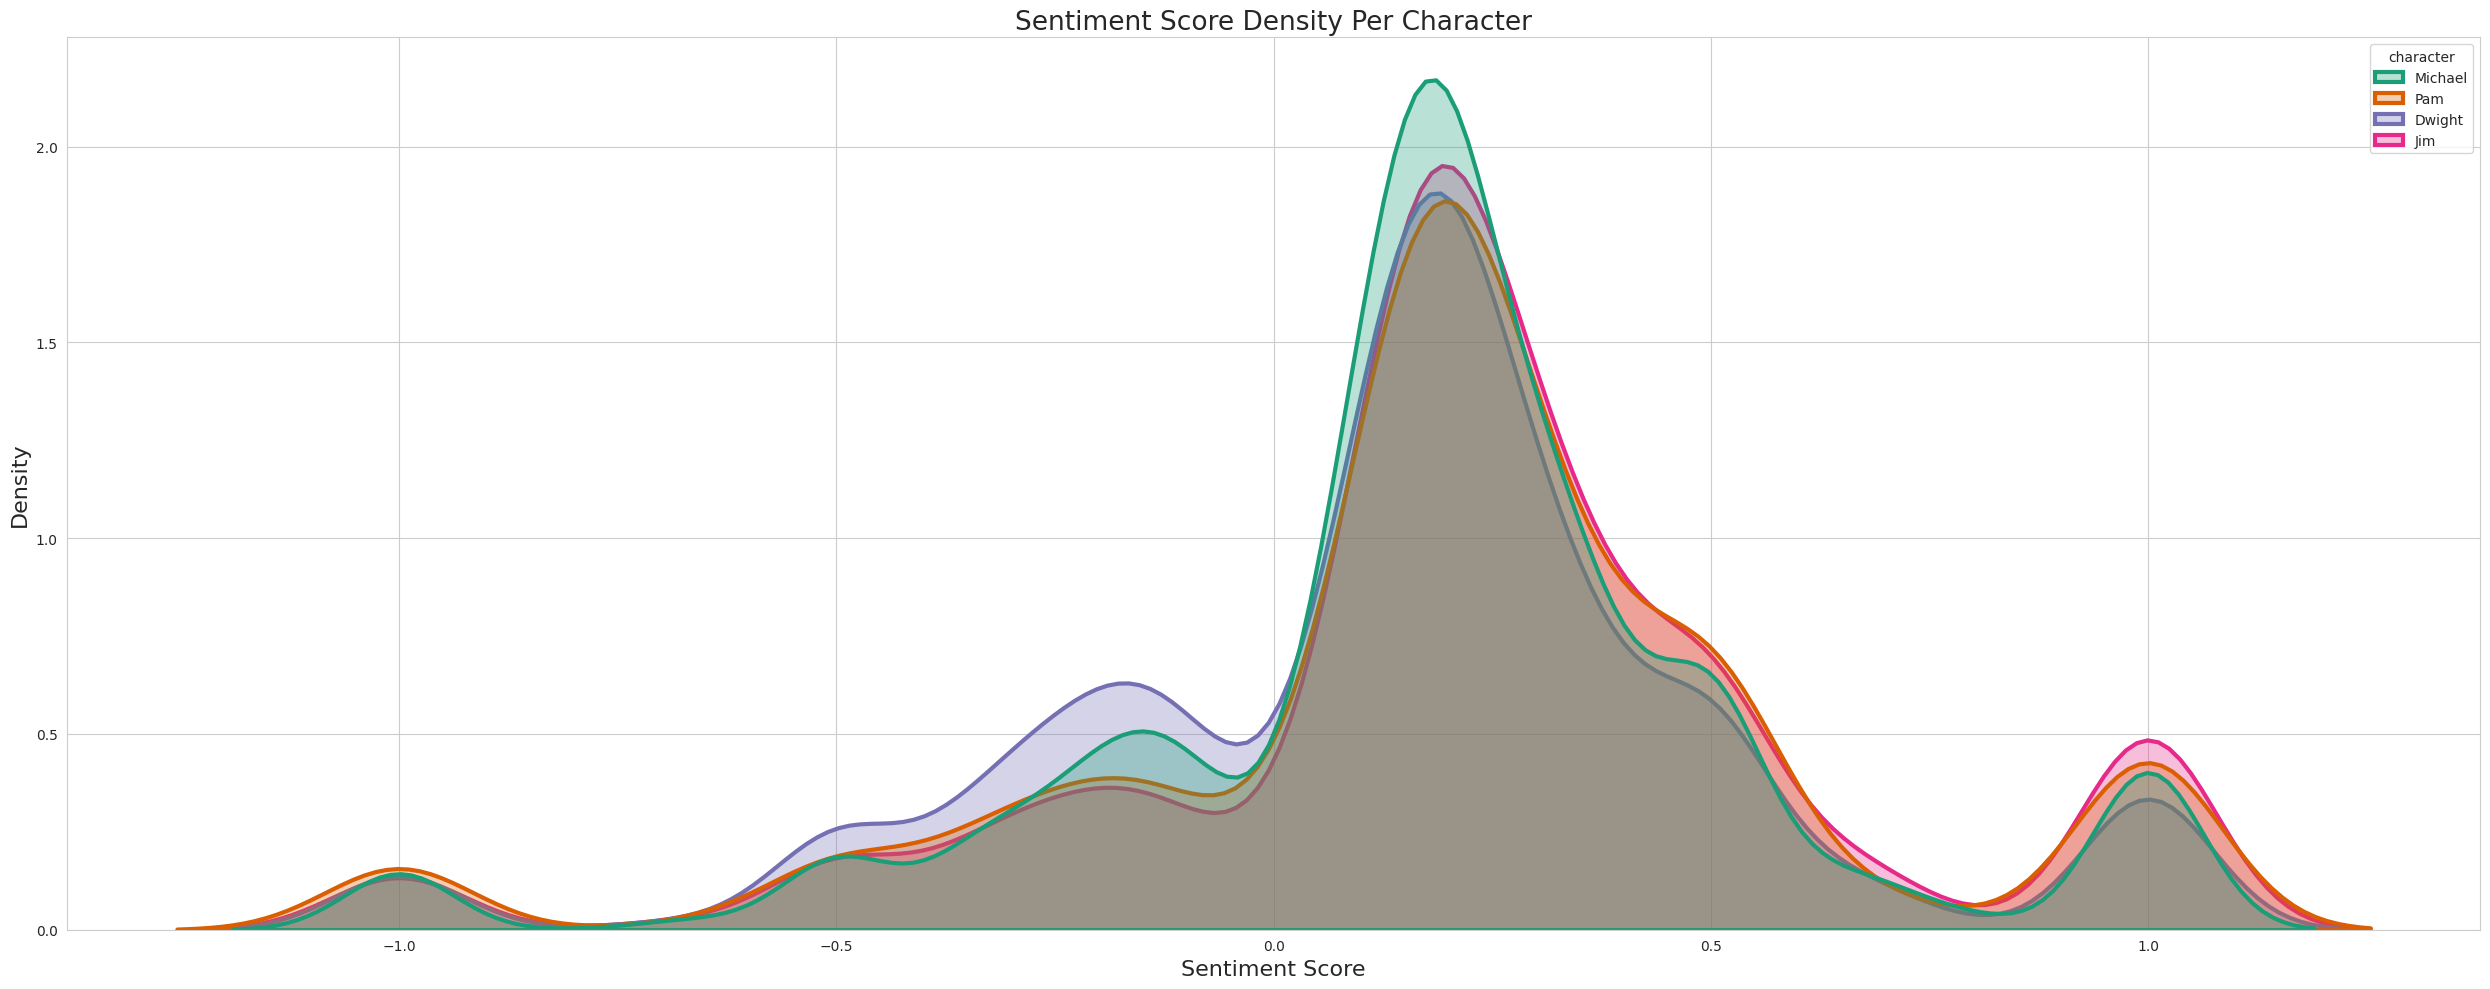

In [ ]:
#create density plot- this is for the whole dataset
characters = ["Jim", "Pam", "Michael", "Dwight"]
characters_df = office_df[office_df['character'].isin(characters)]


characters_df['sentimentAnalysis_score'] = pd.to_numeric(characters_df['sentimentAnalysis_score'], errors = 'coerce')
plt.figure(figsize = (25, 10))
sns.set_style('whitegrid')
palette = sns.color_palette('Dark2')

sns.kdeplot(data = characters_df, x = 'sentimentAnalysis_score', hue = 'character', common_norm = False, fill = True, linewidth = 3, palette = palette, alpha = 0.3)
plt.title("Sentiment Score Density Per Character", fontsize = 19)
plt.xlabel("Sentiment Score", fontsize = 16)
plt.ylabel("Density", fontsize = 16)
plt.tight_layout()
plt.show()


KeyError: 'character'

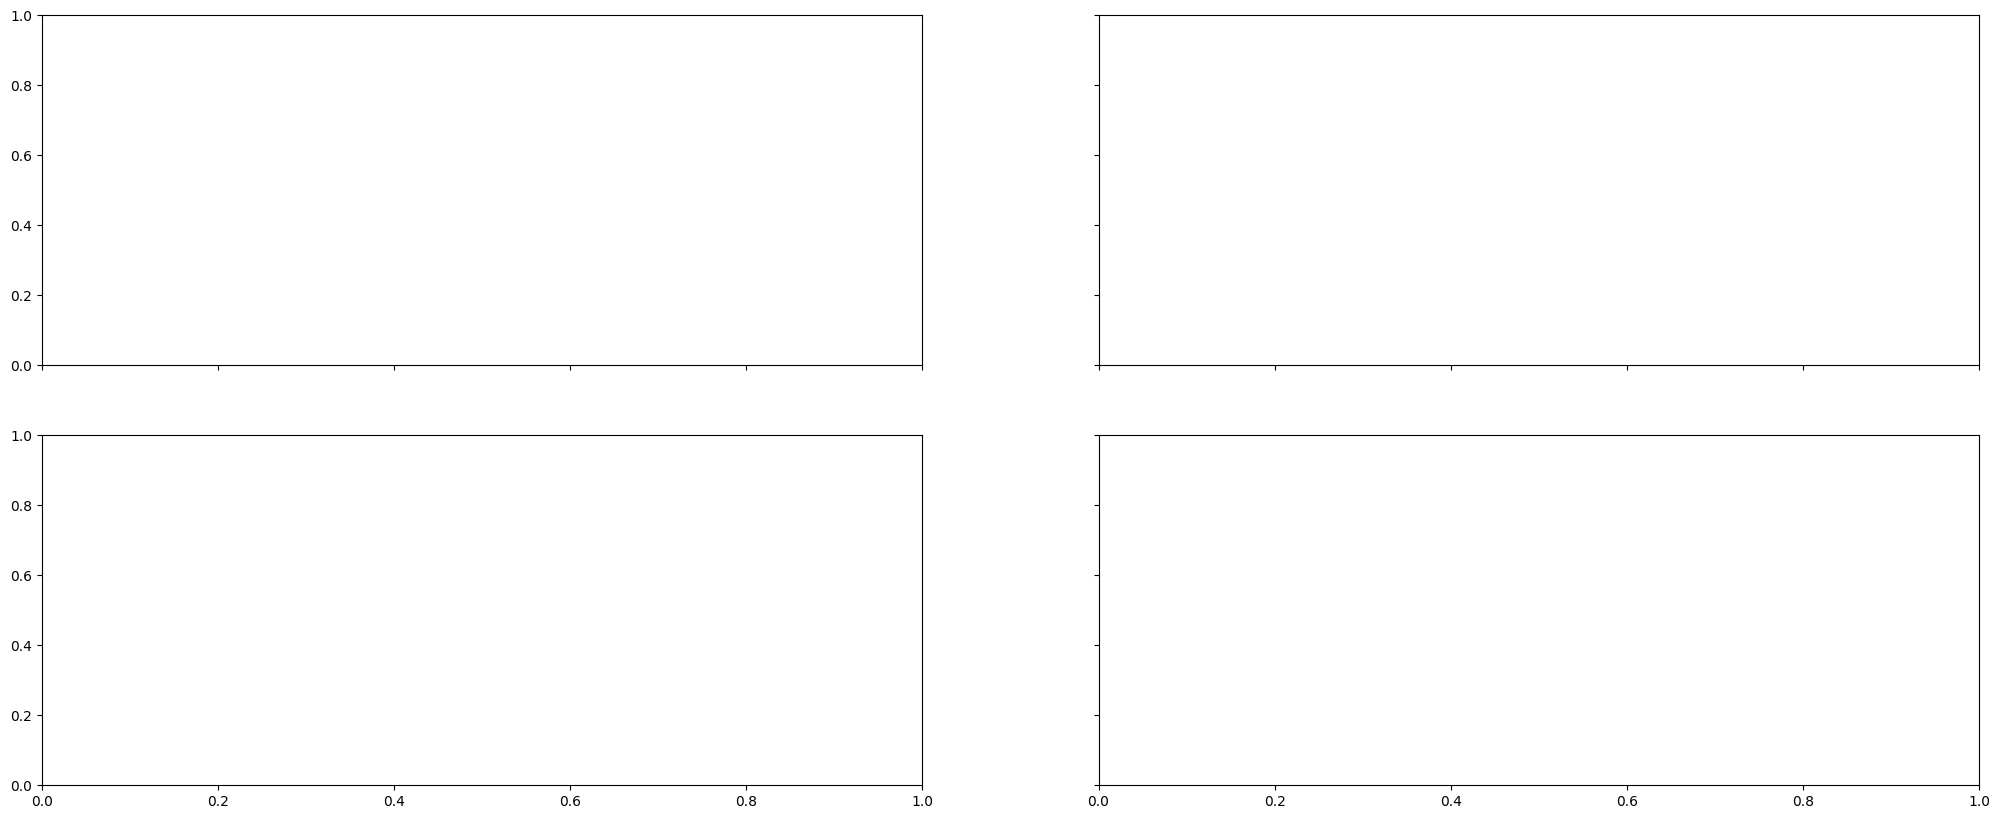

In [ ]:
#density plot with all character's sentiment scores but not overlapped
characters = ['Jim', 'Pam', 'Dwight', 'Michael']
fig, axes = plt.subplots(2, 2, figsize = (25, 10), sharex = True, sharey = True)
for ax, character in zip(axes.flatten(), characters):
  sns.kdeplot(data = characters_df[characters_df['character'] == character], x = 'sentimentAnalysis_score', fill = True, alpha = 0.3, linewidth = 3, ax = ax)
  ax.set_title(character, fontsize = 15)
  fig.suptitle("Character's Sentiment Scores", fontsize = 20)
  plt.tight_layout()
plt.show()

In [5]:
characters = ["Jim", "Pam", "Michael", "Dwight"]
characters_df = office_df[office_df['character'].isin(characters)]
characters_df.head(20)

,index,season,episode,episode_name,director,writer,character,text,text_w_direction,imdb_rating,total_votes,air_date,sentimentAnalysis_score,sentimentr_score,syuzhet_score
0,1,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,All right Jim. Your quarterlies look very good...,All right Jim. Your quarterlies look very good...,7.6,3706,2005-03-24,0.285714,0.134552,2.15
1,2,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Jim,"Oh, I told you. I couldn't close it. So...","Oh, I told you. I couldn't close it. So...",7.6,3706,2005-03-24,0.0,0.461880,0.00
2,3,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,So you've come to the master for guidance? Is ...,So you've come to the master for guidance? Is ...,7.6,3706,2005-03-24,0.428571,0.603738,0.50
3,4,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Jim,"Actually, you called me in here, but yeah.","Actually, you called me in here, but yeah.",7.6,3706,2005-03-24,0.0,0.244949,0.00
4,5,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,"All right. Well, let me show you how it's done.","All right. Well, let me show you how it's done.",7.6,3706,2005-03-24,0.4,0.000000,1.60
5,6,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,"Yes, I'd like to speak to your office manager,...","[on the phone] Yes, I'd like to speak to your ...",7.6,3706,2005-03-24,0.097561,0.000000,4.60
6,7,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,"I've, uh, I've been at Dunder Mifflin for 12 y...","I've, uh, I've been at Dunder Mifflin for 12 y...",7.6,3706,2005-03-24,0.068966,0.000000,0.80
7,8,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Pam,Well. I don't know.,Well. I don't know.,7.6,3706,2005-03-24,0.333333,0.530330,0.80
8,9,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,"If you think she's cute now, you should have s...","If you think she's cute now, you should have s...",7.6,3706,2005-03-24,0.125,0.000000,0.75
9,10,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Pam,What?,What?,7.6,3706,2005-03-24,non-null value,0.000000,0.00
